In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import csv 
import pickle
import joblib
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

/home/yoon/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/yoon/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/yoon/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/yoon/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWa

In [2]:
#csv 파일을 읽어온 후 제대로 읽었는지 확인

train_data = pd.read_csv('./climate_result.csv' )
train_data.head()

,max_tmp,min_tmp,range,hum,wind,label
0,0.3,-6.5,6.8,64.4,2.6,1
1,3.8,-0.7,4.5,65.4,4.0,1
2,4.6,-3.4,8.0,56.9,3.5,1
3,6.1,-2.8,8.9,50.8,4.5,1
4,6.6,-3.2,9.8,45.6,2.9,1


In [3]:
#데이터의 설명, 정보, 상관관계 등을 확인

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   max_tmp  366 non-null    float64
 1   min_tmp  366 non-null    float64
 2   range    366 non-null    float64
 3   hum      366 non-null    float64
 4   wind     366 non-null    float64
 5   label    366 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 17.3 KB


In [4]:
train_data.describe()

,max_tmp,min_tmp,range,hum,wind,label
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,17.867213,9.389617,8.477596,62.105191,4.845355,6.265027
std,9.635350,10.018498,2.963641,15.844109,1.250104,2.959680
min,-6.200000,-12.900000,1.500000,14.900000,2.500000,1.000000
25%,9.400000,0.900000,6.300000,50.400000,4.000000,4.000000
50%,18.650000,8.600000,8.600000,62.900000,4.600000,8.000000
75%,26.300000,18.900000,10.500000,72.475000,5.500000,9.000000
max,35.400000,27.000000,16.500000,95.800000,9.800000,9.000000


In [5]:
train_data.corr()

,max_tmp,min_tmp,range,hum,wind,label
max_tmp,1.000000,0.955267,0.021937,0.449097,-0.017995,0.726559
min_tmp,0.955267,1.000000,-0.274719,0.606057,0.022880,0.585052
range,0.021937,-0.274719,1.000000,-0.588660,-0.135851,0.384428
hum,0.449097,0.606057,-0.588660,1.000000,-0.038239,0.176436
wind,-0.017995,0.022880,-0.135851,-0.038239,1.000000,-0.054055
label,0.726559,0.585052,0.384428,0.176436,-0.054055,1.000000


<AxesSubplot:>

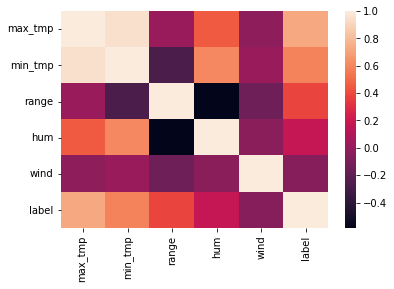

In [6]:
sns.heatmap(train_data.corr())

<AxesSubplot:>

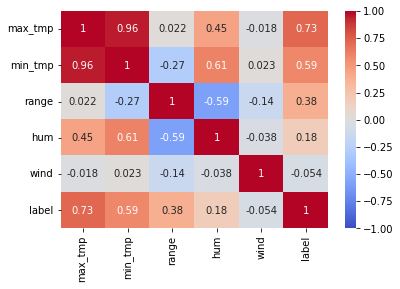

In [7]:
sns.heatmap(train_data.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

In [8]:
#데이터를 변수와 레이블로 나눠줌

X = train_data.iloc[:,[0,1,2,3,4]].values
y = train_data.iloc[:,[5]].values

In [9]:
#데이터셋을 Train과 Val의 데이터셋으로 나눠줌

train_x, val_x, train_y, val_y = train_test_split(X,y,test_size=0.2,random_state=20)

In [10]:
#Decision Tree의 모델

model = DecisionTreeClassifier(max_depth=7,random_state=2)

In [11]:
#Decision Tree 학습
model.fit(train_x,train_y)
model_pred = model.predict(val_x)

#정확도 평가
model.score(train_x, train_y), model.score(val_x, val_y)

(0.9863013698630136, 0.9594594594594594)

In [12]:
#변수값을 집어넣어 예측값 확인해보는 부분
#arr= np.array([[10, 20.5 ,10.5, 3, 60]])
#model_pred = model.predict(arr)

#model_pred[0]

In [13]:
# 학습모뎅을 피클로 저장
with open('saved_model.pkl', 'wb') as f:
    pickle.dump(model, f)
